# Script 13: Lendo Campos Especificando o Nível - Linhas de Corrente
Neste script vamos aprender a ler os campos de interesse especificando o nível (em hPa). Também pela primeira vez, vamos realizar um cálculo utilizando dois campos, além de criar um plot de linhas de corrente.

Init: 2021-07-16 00:00:00 UTC
Run: 00Z
Forecast: +0
Valid: 2021-07-16 00:00:00 UTC


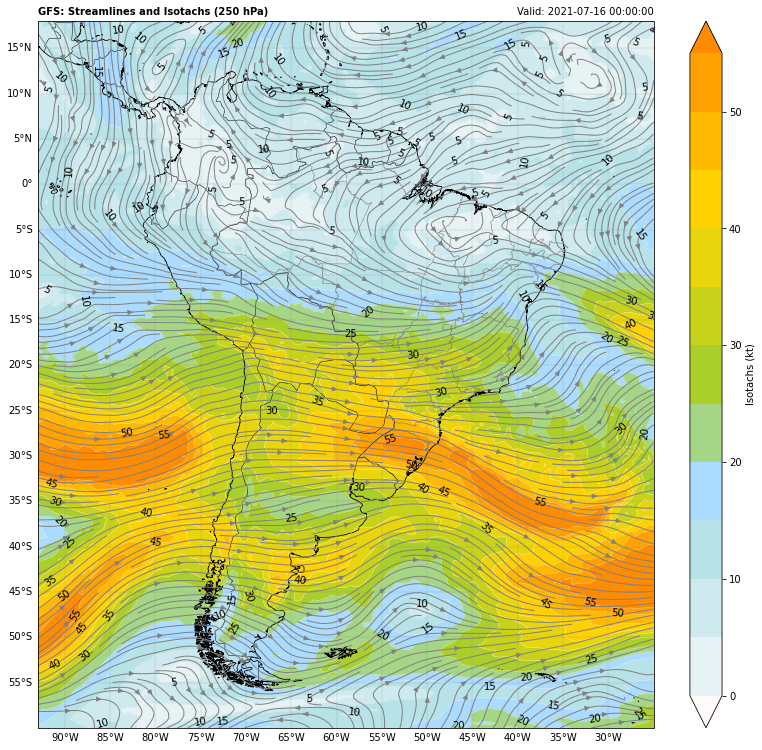

In [1]:
#-----------------------------------------------------------------------------------------------------------
# Curso INPE / CPTEC Training: NWP Data Processing With Python - Script 13: Choosing Fields by Levels - Streamlines  
# Instrutor: Diego Souza
# Adaptado: Dejanira F Braz
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python 
#-----------------------------------------------------------------------------------------------------------   

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

#-----------------------------------------------------------------------------------------------------------

# Select the variable
ucomp = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]

# Get information from the file    
init  = str(ucomp.analDate)      # Init date / time
run   = str(ucomp.hour).zfill(2) # Run
ftime = str(ucomp.forecastTime)  # Forecast hour
valid = str(ucomp.validDate)     # Valid date / time 
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
ucomp, lats, lons = ucomp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------

# Select the variable
vcomp = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]

# Read the data for a specific region
vcomp = vcomp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Calculate the wind speed
ws = np.sqrt(ucomp**2 + vcomp**2)

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('Shapefile/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = 0
data_max = 60 
interval = 5
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette 
colors = ["#e7f2f4", "#ceeaee", "#b6e2e8", "#abdcff", "#a4d685", "#9cd04e", 
          "#abcf2a", "#c9d21b", "#e8d50c", "#ffd100", "#ffba00", "#ffa200"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#ff8c00')
cmap.set_under('#fffafa')

# Plot the contours
img1 = ax.contourf(lons, lats, ws, cmap=cmap, levels=levels, extend='both')    
img2 = ax.contour(lons, lats, ws, colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Plot the streamlines
from matplotlib.axes import Axes
img3 = Axes.streamplot(ax, lons, lats, ucomp, vcomp, density=[4, 4], linewidth=1, color='gray', transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(img1, label='Isotachs (kt)', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: Streamlines and Isotachs (250 hPa)' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('Figure/image_13.png')

# Show the image
plt.show()